<a href="https://colab.research.google.com/github/A01794938/TC4033.10/blob/main/10_morphological_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en inteligencia Artificial Aplicada.**##



**TC4033.10 Visión Computacional para imágenes y video**

4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas




Equipo #33

Jonathan Alberto López Rodríguez - A01794938

Francisco Medellin Zertuche - A01794044

Edgar Rusef Hernández García - A01795076

# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

8. [Actividad 4.2 Operaciones Morfologicas](#Actividad.4.2)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

(400, 700, 3) (400, 700, 3) (400, 700)


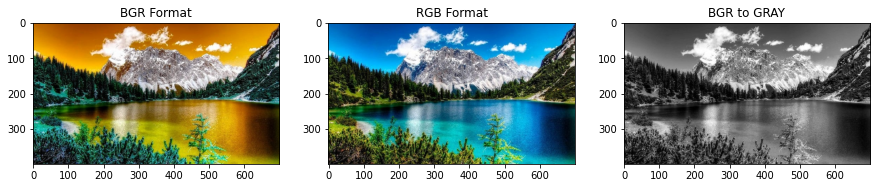

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()

imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

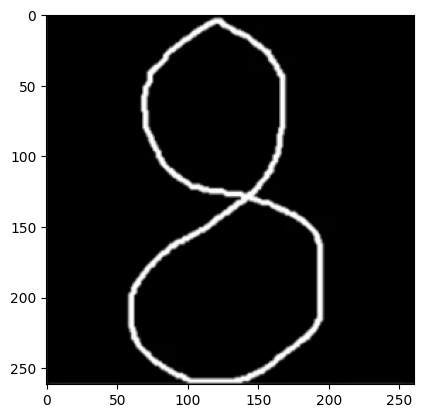

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

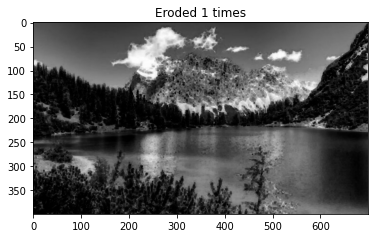

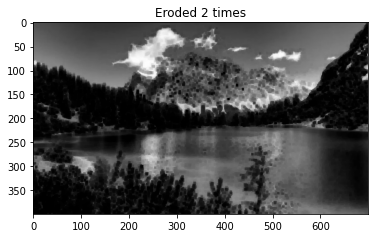

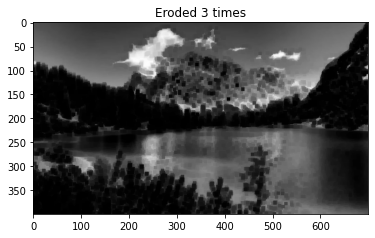

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

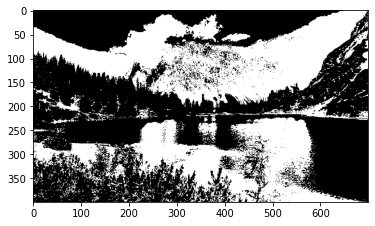

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

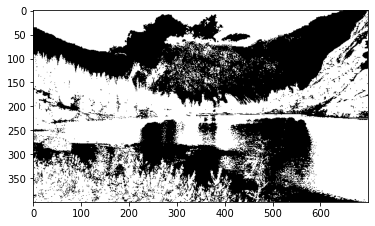

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


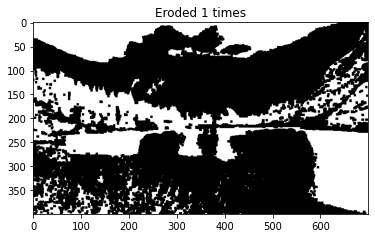

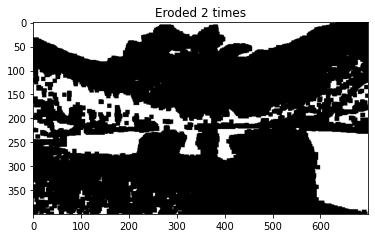

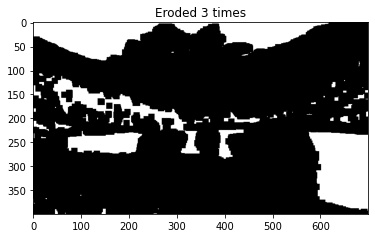

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

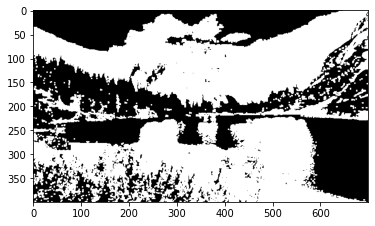

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


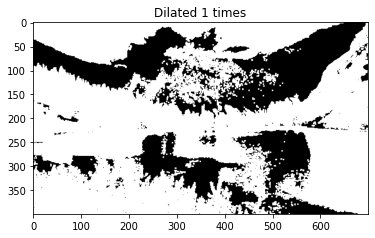

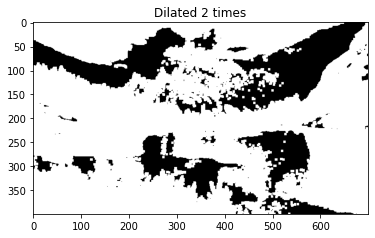

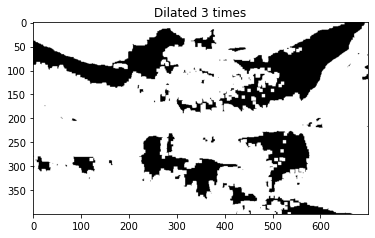

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

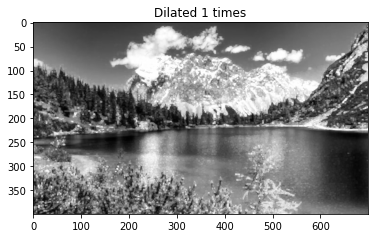

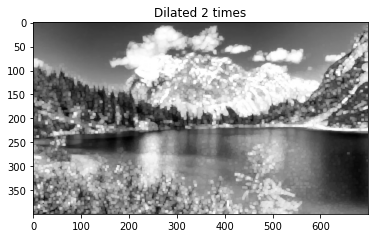

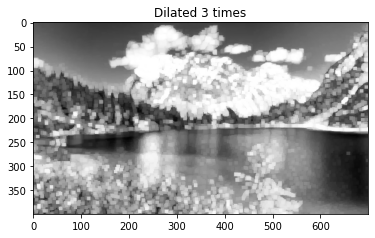

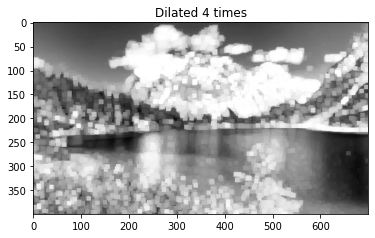

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


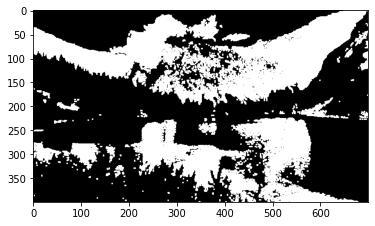

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

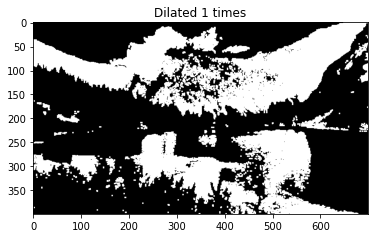

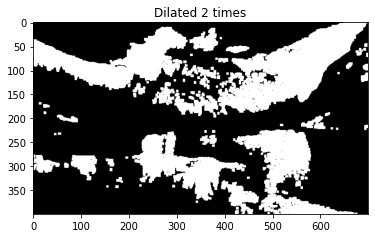

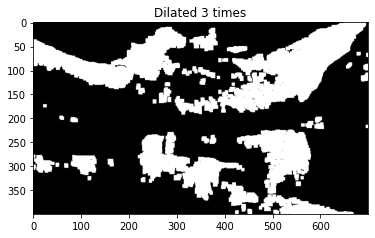

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

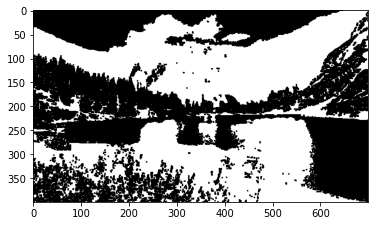

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

#print output
plt.imshow(closing,cmap='gray')
plt.show()

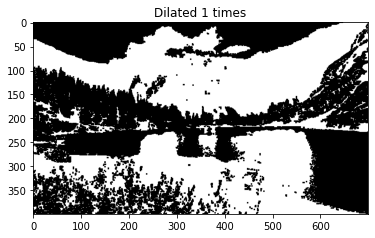

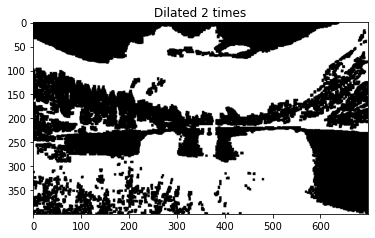

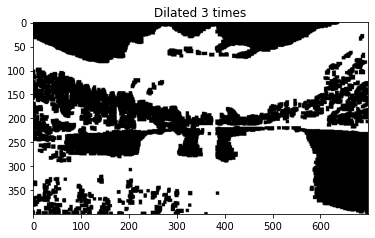

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

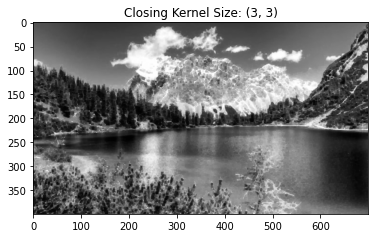

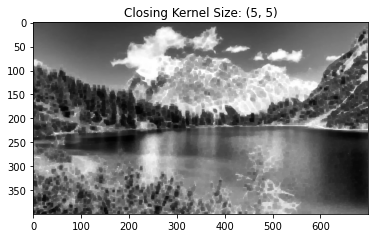

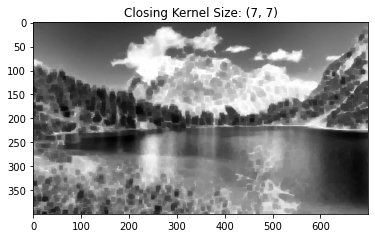

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

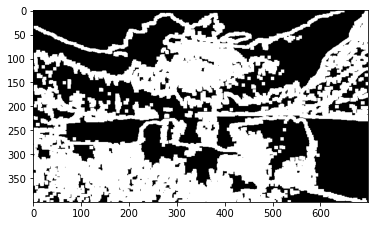

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

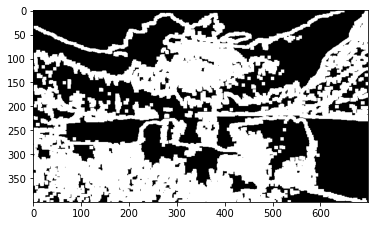

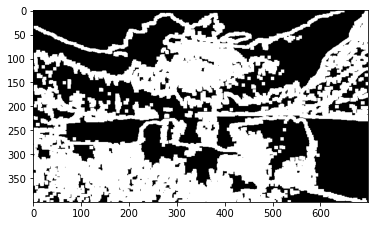

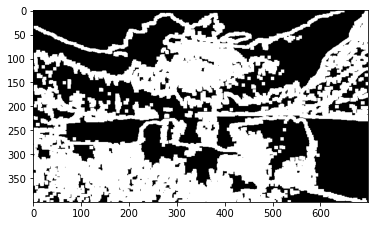

In [ ]:
for i in range(0,3):
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

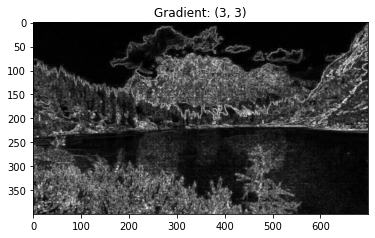

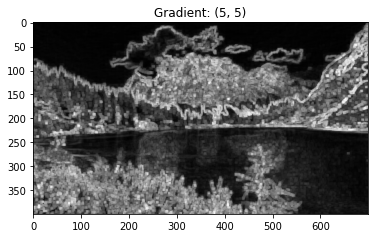

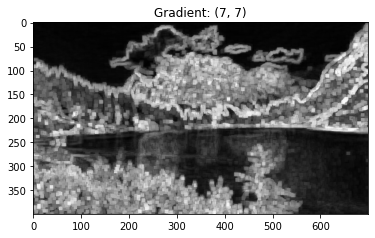

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

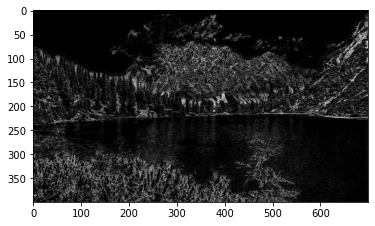

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


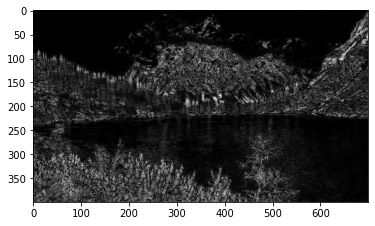

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

# 4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas <a class="anchor" id="Actividad.4.2" ></a>


En esta sesión profundizaremos en el estudio de las técnicas de mejoramiento de imágenes usando técnicas basadas en operadores morfológicos en el dominio espacial. Los temas discutidos de forma teórica en la clase previa serán abordados aquí de forma teórica usando Google Colab.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import requests
from io import BytesIO
from PIL import Image

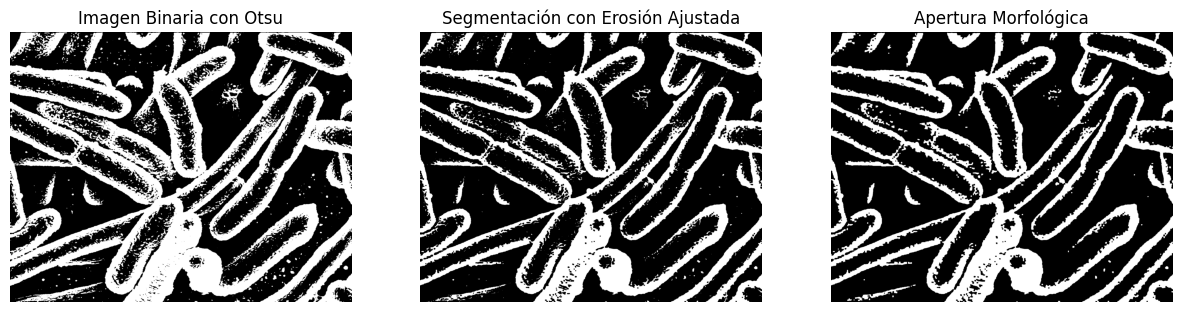

In [5]:
url = "https://raw.githubusercontent.com/A01794938/TC4033.10/main/bacterial-cells-sem-micrograph.webp"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convertir la imagen a escala de grises
bacteria_imagen = np.array(img.convert('L'))

# Aplicar suavizado Gaussiano para reducir ruido antes de la umbralización
bacteria_suavizada = cv2.GaussianBlur(bacteria_imagen, (5,5), 0)

# Umbralización con Otsu
_, bacteria_binaria_otsu = cv2.threshold(bacteria_suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Definir un kernel
kernel_bacteria = np.ones((5,5), np.uint8)

# Erosión con una sola iteración
bacteria_segmentada_ajustada = cv2.erode(bacteria_binaria_otsu, kernel_bacteria, iterations=1)

# Apertura morfológica
bacteria_apertura = cv2.morphologyEx(bacteria_segmentada_ajustada, cv2.MORPH_OPEN, kernel_bacteria)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(bacteria_binaria_otsu, cmap='gray')
plt.title("Imagen Binaria con Otsu")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(bacteria_segmentada_ajustada, cmap='gray')
plt.title("Segmentación con Erosión Ajustada")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(bacteria_apertura, cmap='gray')
plt.title("Apertura Morfológica")
plt.axis("off")

plt.show()

En este trabajo, la erosión fue aplicada a imágenes de células y bacterias microscópicas, ajustando los parámetros para obtener una segmentación óptima. Se utilizaron diferentes estrategias, incluyendo filtros de suavizado, umbralización de Otsu y apertura morfológica, para mejorar la calidad de la segmentación y reducir el ruido.


*Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Pearson.*

*Soille, P. (2004). Morphological Image Analysis: Principles and Applications (2nd ed.). Springer.*


## a) Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo



Una aplicación útil de la erosión es la **segmentación de objetos conectados** donde se utiliza para separas las formas que usualmente estan pegados, sobrepuestos o muy juntos por medio del uso de kernel para debilitar esas conexiones entre objetos.

Según el libro, la erosión aplicada a imágenes binarizadas se define matemáticamente como:

𝐴
⊖
𝐵
=
{
𝑧
∣
(
𝐵
)
𝑧
⊆
𝐴
}

donde:

𝐴
A es la imagen original.

𝐵
B es el elemento estructurante (kernel).

(
𝐵
)
𝑧
⊆
𝐴
(B)
z
​
 ⊆A indica que el kernel debe encajar completamente dentro de la región blanca para que el píxel central permanezca.

 El sector médico se usa en imágenes biomédicas para separar celulas y facilitar tareas de conteo o identificación.

## b) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo



La dilatación es una operación morfológica que expande las regiones blancas de una imagen binaria, haciendo que los objetos crezcan en tamaño. Su principal aplicación es en rellenar huecos, conectar componentes desconectados y eliminar ruido en imágenes procesadas.

**Aplicación: Mejora en Reconocimiento Óptico de Caracteres (OCR):**

En OCR, la dilatación se usa para conectar caracteres fragmentados, si los caracteres tienen cortes o espacios por ruido, la dilatación ayuda a unirlos.
Rellenar imperfecciones: Letras con huecos pueden ser reconstruidas.
Eliminar líneas delgadas no deseadas: Ruido como grietas en letras se eliminan.


Cargamos una imagen con un digito para pruebas. Aplicremos dilatación sobre una imagen con texto ruidoso para mejorar su legibilidad antes del OCR.


AxesImage(shape=(262, 261))


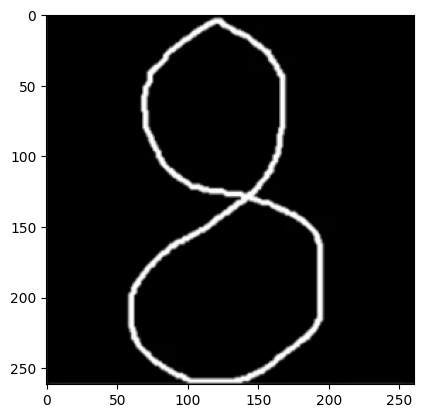

In [ ]:
def return_8_digit():
  url = "https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/8-digit-ocr.png"
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return img

img = return_8_digit()
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(plt.imshow(BGR2GRAY,cmap="gray"))
#plt.show()

Como podemos observar la imagen no contiene demasiado ruido, esto en entornos productivos no siempre se puede obtener por lo que necesitaremos estar preparados para posibles casos donde las lineas del digito se encuentren con detalles o problemas de continuidad, asi que la someteremos a ruido.

In [ ]:
def generate_noise(img,rng,ptx):
  # Agregar ruido (líneas delgadas que interrumpen las letras)
  for i in range(rng[0],rng[1],rng[2]):
    cv2.line(img, (0, i), (250, i), (0,), ptx)
  return img

AxesImage(shape=(262, 261))


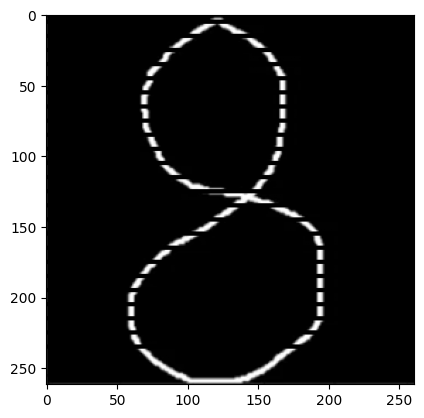

In [ ]:
image_to_fix = generate_noise(BGR2GRAY, (5,240,10) , 2 )
print(plt.imshow(image_to_fix,cmap="gray"))

**Aplicación**
En estos casos podemos donde queremos eliminar líneas delgadas no deseadas: Ruido como grietas en letras se eliminan es donde podemos hacer uso de la dilatacion.


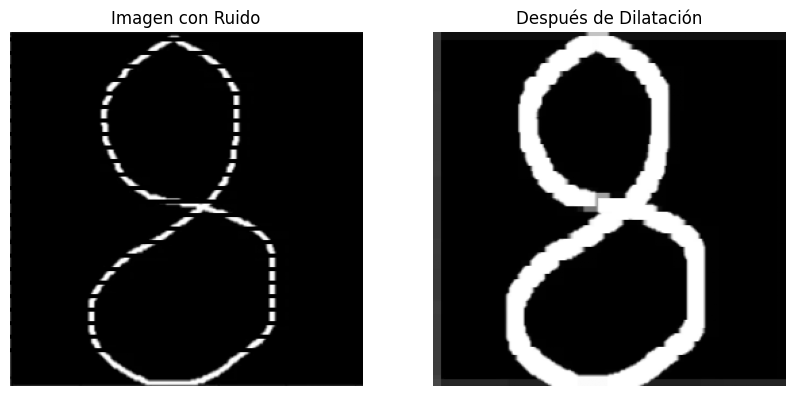

In [ ]:
# Crear un kernel de 10x10 para la dilatación
kernel = np.ones((10,10), np.uint8)

# Aplicar dilatación
dilated_img = cv2.dilate(image_to_fix, kernel, iterations=1)

# Mostrar la imagen original y la procesada
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_to_fix, cmap='gray')
ax[0].set_title("Imagen con Ruido")
ax[0].axis("off")

ax[1].imshow(dilated_img, cmap='gray')
ax[1].set_title("Después de Dilatación")
ax[1].axis("off")

plt.show()

Podemos observar  la aplicación de la dilatación en una imagen de texto con ruido. En la imagen original, el ruido interrumpe las letras, mientras que después de aplicar dilatación, las letras se reconstruyen y el ruido disminuye. Esto facilita su posterior procesamiento en OCR. <br>

-  Reconstrucción de caracteres dañados o interrumpidos.
-  Reducción del ruido antes del reconocimiento óptico de caracteres.
-  Mejora la detección de contornos en segmentación de texto.



Referencias Bibliográficas y Web
📖 Libros:

Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Pearson.
Capítulo 9: Técnicas morfológicas para la mejora y análisis de imágenes.
🌐 Recursos Web:

- OpenCV Documentation: [Dilation in OpenCV](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)
- Understanding Morphological Image Processing and Its Operations [Medium Morphological Data Science](https://medium.com/towards-data-science/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756)

## c) Investigar una aplicación de opening y closing e implementalo


### Opening (Apertura)
Consiste en aplicar erosión seguida de dilatación.
Propósitos:
- Elimina ruido pequeño sin afectar significativamente la estructura de los objetos.
- Eliminación de ruido en imágenes binarias o en segmentación de imágenes
- Preprocesamiento en visión por computadora para mejorar la detección de objetos.

**Aplicación:** Eliminación de ruido en imágenes segmentadas para mejorar la deteccion de caracteristicas de una imagen. En este caso para el analisis de huellas digitales.

AxesImage(shape=(401, 530))


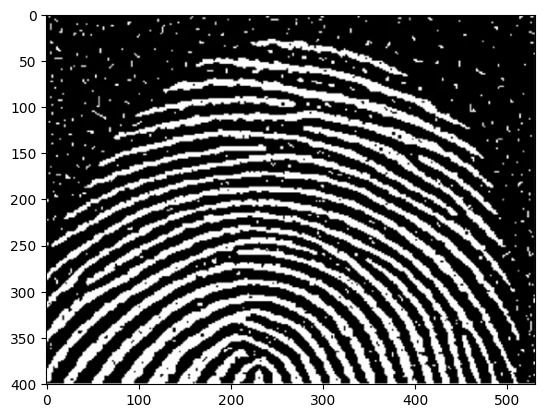

In [ ]:
url = "https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/print-after-segmentation.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(plt.imshow(img,cmap="gray"))
#plt.show()

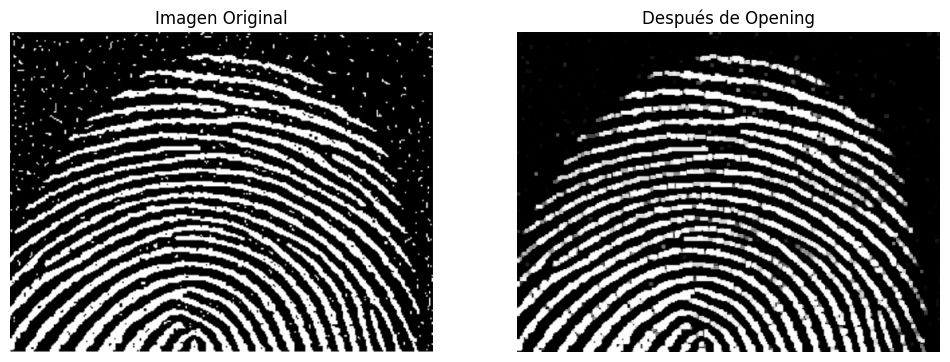

In [ ]:
# Crear un kernel 4x4 para opening y closing
kernel = np.ones((4, 4), np.uint8)

# Aplicar Opening (elimina ruido)
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Mostrar imágenes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Imagen Original")
ax[0].axis("off")

ax[1].imshow(img_opening, cmap='gray')
ax[1].set_title("Después de Opening")
ax[1].axis("off")

plt.show()

### Closing (Cierre)
Consiste en aplicar dilatación seguida de erosión.
Propósito:
- Rellena pequeños huecos o discontinuidades en los objetos, cierre de pequeñas regiones en segmentación.
- Closing: Se usa para conectar regiones separadas en la imagen.


En opening logramos reducir el ruido pero se vio afectado la continuidad de lineas blancas o se provocaron pequeñas regiones en segmentación con huecos. <br>
Esto lo podemos corregir ahora aplicando un closing a la image de salida de opening para obtener una mejor imagen.

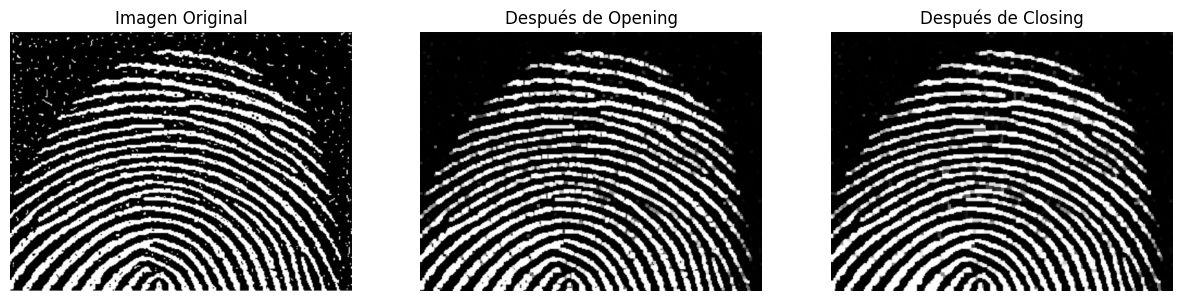

In [ ]:
# Crear un kernel 3x3 para opening y closing
kernel = np.ones((5, 5), np.uint8)

# Aplicar Closing (cierra huecos en letras)
img_closing = cv2.morphologyEx(img_opening, cv2.MORPH_CLOSE, kernel)

# Mostrar imágenes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Imagen Original")
ax[0].axis("off")

ax[1].imshow(img_opening, cmap='gray')
ax[1].set_title("Después de Opening")
ax[1].axis("off")

ax[2].imshow(img_closing, cmap='gray')
ax[2].set_title("Después de Closing")
ax[2].axis("off")

plt.show()


Otra aplicacion seria retomar el caso de digitos donde tambien útil para cerrar pequeños agujeros dentro de objetos en primer plano o pequeñas manchas negras en el objeto.

AxesImage(shape=(262, 261))


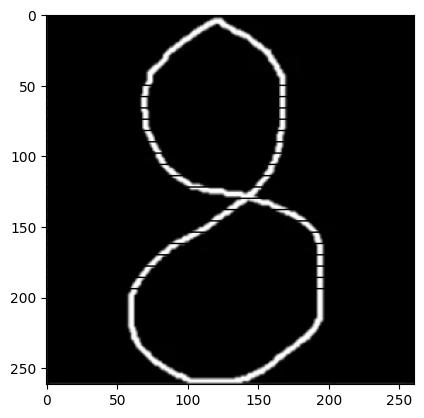

In [ ]:
img_digit = return_8_digit()
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image_to_fix = generate_noise(BGR2GRAY, (50,200,8) , 1 ) # Generate noise to the image digit
print(plt.imshow(image_to_fix,cmap="gray"))

Aplicamos closing

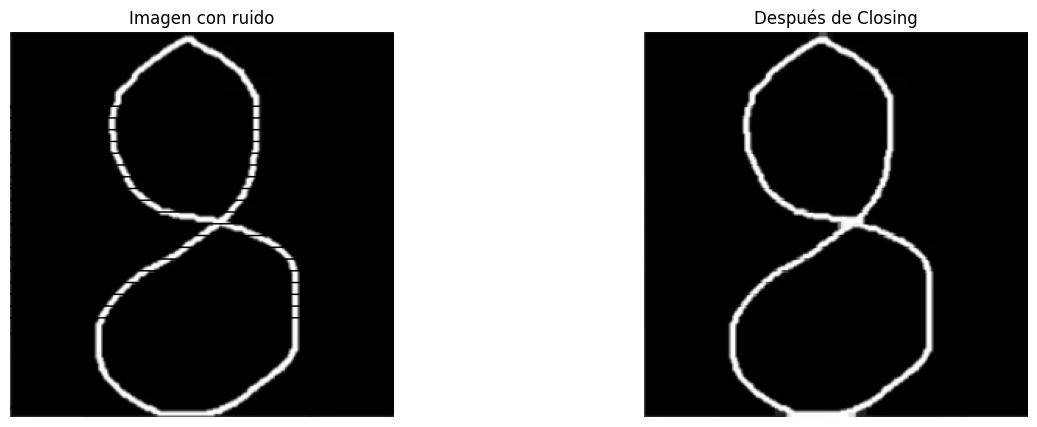

In [ ]:
# Crear un kernel 3x3 para opening y closing
kernel = np.ones((5, 5), np.uint8)

# Aplicar Closing (cierra huecos en letras)
img_closing = cv2.morphologyEx(image_to_fix, cv2.MORPH_CLOSE, kernel)

# Mostrar imágenes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image_to_fix, cmap='gray')
ax[0].set_title("Imagen con ruido")
ax[0].axis("off")

ax[1].imshow(img_closing, cmap='gray')
ax[1].set_title("Después de Closing")
ax[1].axis("off")

plt.show()

Referencias Bibliográficas y Web
📖 Libros:

Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Pearson.
Capítulo 9: Técnicas morfológicas para la mejora y análisis de imágenes.
🌐 Recursos Web:

- OpenCV Documentation: [Dilation in OpenCV](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)
- Understanding Morphological Image Processing and Its Operations [Medium Morphological Data Science](https://medium.com/towards-data-science/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756)